# 안녕하세요^^ 
# AI 프로젝트 - 원내비 도착시간 예측 모델링 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 주변에서 마주할 수 있는 연속성을 가지는 수치를 예측할 수 있는 회귀문제를 예제코드를 통해서 기계학습(머신러닝 및 딥러닝)을 활용해서 해결할 것입니다.
* 네비게이션 주행데이터를 가지고 도착시간 정확도를 개선하는 과정을 통해 실전 AI 과제 수행에 있어 자신감을 가질 수 있는 기회가 되었으면 좋겠습니다.
* 또한 각 단계별로 드래곤볼을 찾는 미션을 통해 과정에 대한 이해를 도울 수 있도록 구성했습니다.
* AI문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 데이터 분석!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 첫 번째 마을 '데이터 분석' 마을에 도착했습니다.
* 그럼, 지금부터 첫 번째 드래곤볼을 찾아볼까요?

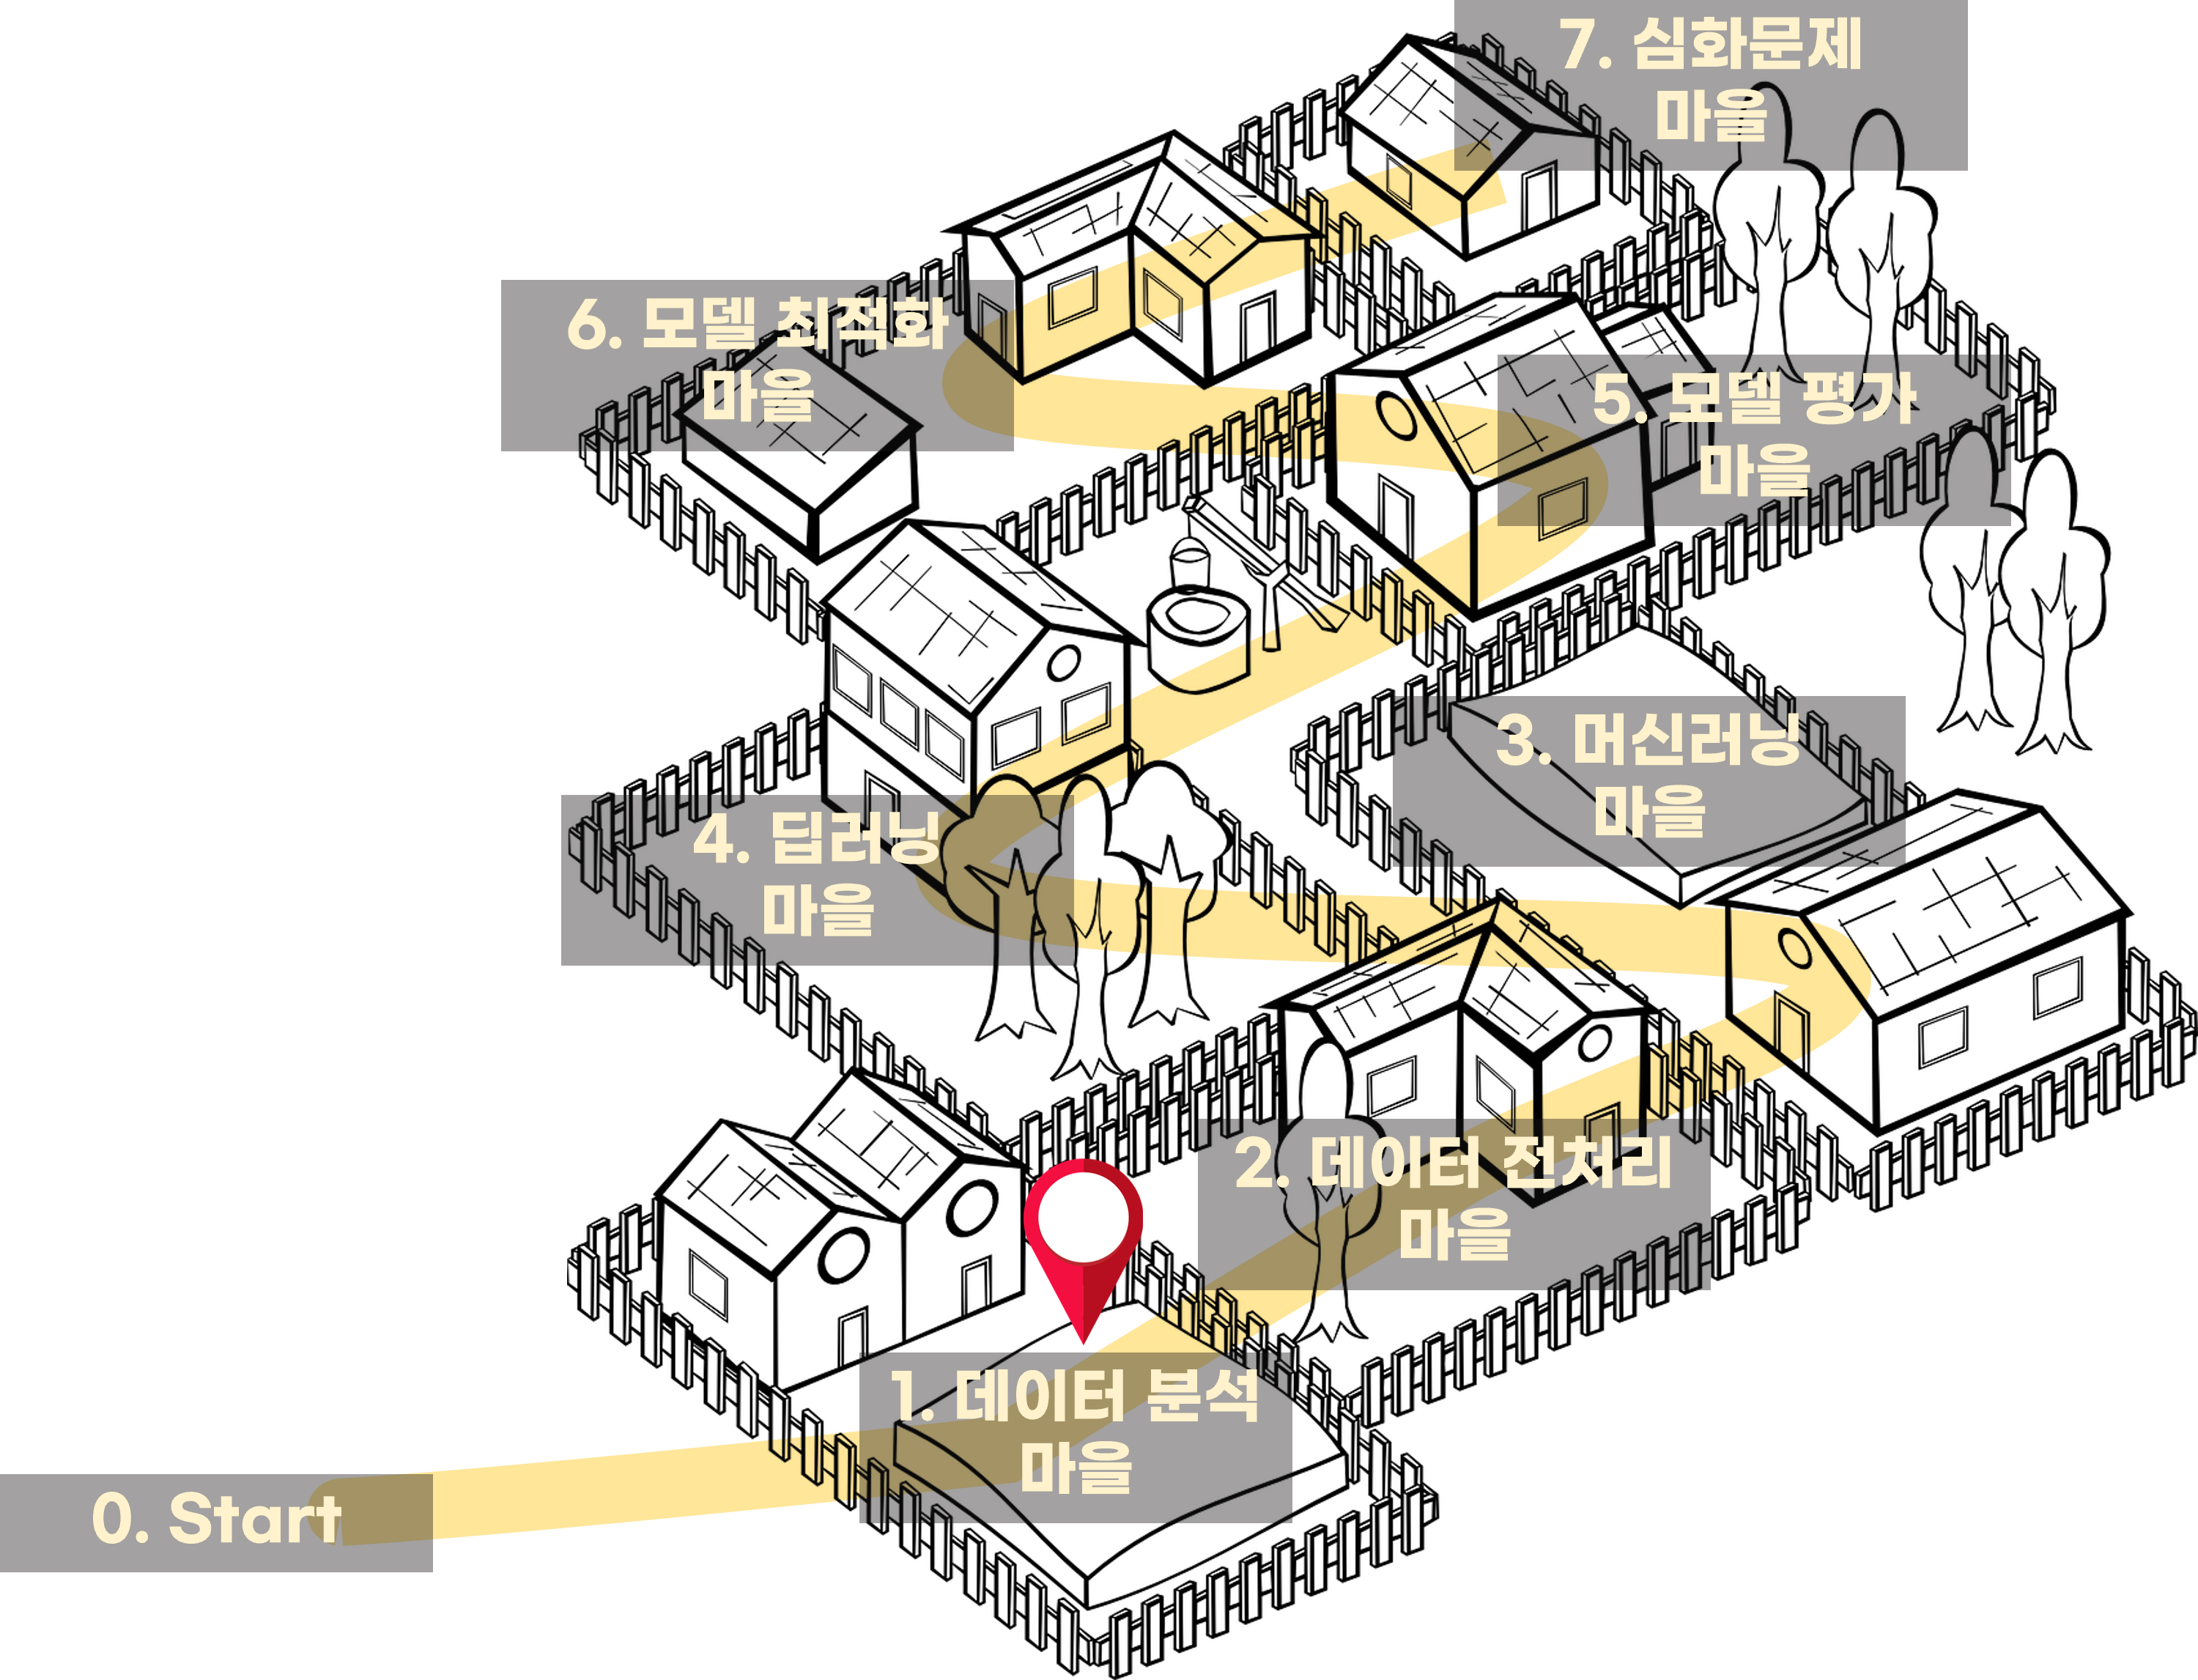

### [상황] 첫 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn gspread==5.0.0 oauth2client

  Attempting uninstall: gspread
    Found existing installation: gspread 5.5.0
    Uninstalling gspread-5.5.0:
      Successfully uninstalled gspread-5.5.0


In [2]:
# ID를 입력해주세요.
ID = "Test1"

---

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 학습데이터 : onenavi_train.csv(7월 20일에서 24일 사이의 수도권 3~15km 주행데이터)
* 평가데이터 : onenavi_evaluation.csv(7월 27일에서 31일 사이의 수도권 3~15km 주행데이터)

[추가 데이터]
* 주소(시군구)데이터 : onenavi_pnu.csv(주행데이터를 기준으로 출발지의 주소 정보, key : RID)
* 신호등(갯수)데이터 : onenavi_signal.csv(주행데이터를 기준으로 경로의 신호등 갯수, key : RID)
* 날씨데이터 : onenavi_weather.csv(주행데이터를 기준으로 해당 일자의 수도권 날씨 정보, key : RID)

### 변수 소개
* RID : RouteID(경로 아이디로 주행 시 생성)
* TIME_DEPARTUREDATE : 출발시간
* TIME_ARRIVEDATE : 도착시간
* A_DISTANCE : 실 주행 거리
* ET : 실제 주행 시간
* ETA : 원내비 예측 주행 시간
* ETAA : 예측 주행 시간 정확도

---

# 1. 데이터 불러오기
## 모든 AI프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

### 가. 데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'onenavi_train.csv'파일을 'df' 변수에 저장하고 그 Shape을 확인하세요.
* 아래에 'Pandas'를 Import하고 'onenavi_train.csv'파일을 불러오고 Shape을 확인하는 소스코드를 작성하고 실행해보세요.
* 데이터 파일 로딩시 참고 사항 : 구분자(sep)는 '|'(파이프라인)
* 단서 : 데이터프레임의 열(변수) 갯수, Hint : Shape을 출력했을 때 나오는 2개의 숫자 중 2번째

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

df = pd.read_csv('raw_data/onenavi_train.csv',sep="|")


In [4]:
df

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.534058,987.624634,82.196974
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.817017,855.933716,96.101477
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.710999,575.954529,90.650750
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.581970,537.117004,59.773846
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.758972,786.352539,82.103385
...,...,...,...,...,...,...,...
55895,router-84875df7fc-8n4sw-2-7745536-0,2020-07-24 23:57:07.000,2020-07-25 00:06:15.697,4448.0,544.301025,550.907715,98.786207
55896,router-84875df7fc-scxcj-1-6043477-0,2020-07-24 23:57:26.000,2020-07-25 00:07:15.291,3106.0,535.666992,459.554443,85.791070
55897,router-84875df7fc-b5nxc-6-13399736-0,2020-07-24 23:57:46.000,2020-07-25 00:07:56.841,10325.0,610.799988,791.658936,70.389825
55898,router-84875df7fc-cmkz9-7-56753908-0,2020-07-24 23:58:03.000,2020-07-25 00:12:42.402,4458.0,878.479004,516.855774,58.835302


In [5]:
# 데이터 프레임의 Shape을 확인합니다.
df.shape




(55900, 7)

In [6]:
# 아래에 단서를 적어주세요.
단서1 = "7" # 단서1을 적어주세요.(문자형으로 적어주세요.)

### 나. 학습데이터와 평가데이터 합치기
#### 학습데이터(onenavi_train.csv)는 7월 20일에서 24일까지 자료입니다.
#### 평가데이터(onenavi_evaluation.csv)는 7월 27일에서 31일까지 자료입니다.

#### [실습문제2] 데이터 합치기
* Pandas 라이브러리를 활용해서 'onenavi_train.csv'파일과 'onenavi_evaluation.csv'를 합쳐서 'df_total' 변수에 저장하고 그 Shape을 확인하세요.
* 아래에 'onenavi_train.csv'와 'onenavi_evaluation.csv' 파일을 불러오고 pandas의 <u>'concat' 함수를 활용</u>해서 데이터를 합친 후, Shape을 확인하는 소스코드를 작성하고 실행해보세요.
* 데이터 파일 로딩시 참고 사항 : 구분자(sep)는 '|'(파이프라인)
* 단서 : 데이터프레임의 행(데이터) 갯수, Hint : Shape을 출력했을 때 나오는 2개의 숫자 중 1번째

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df = pd.read_csv('raw_data/onenavi_train.csv',sep="|")
df_eval = pd.read_csv('raw_data/onenavi_evaluation.csv',sep="|")

df_total = pd.concat([df,df_eval])

In [8]:
# 데이터 프레임의 Shape을 확인합니다.
df_total.shape





(109642, 7)

In [9]:
# 아래에 단서를 적어주세요.
단서2 = "109642"# 단서2를 적어주세요.(문자형으로 적어주세요.)

---

# 2. 추가변수 생성
## 주어진 데이터만 가지고 모델링을 한다면 세상을 너무 만만하게 보고 있는 것입니다.
+ KeyPoint : 모델에 영향을 줄 수 있는 다양한 변수를 고민하고 기존 데이터와 Merge 할 수 있다.

#### 사실 추가변수 생성은 데이터 전처리 영역의 범위로 보는 경우도 있습니다.
#### 데이터 분석과 전처리는 '닭이 먼저냐? 달걀이 먼저냐?'와 같이 상호 인과관계를 가질 수 있습니다.
#### 다만 여기서는 교육의 원활한 진행을 위해 데이터 분석 이전에 진행하겠습니다.
#### 주행에 영향을 미치는 요소는 어떤 것이 있을까요? 저는 좌표정보와 경로의 신호등 여부를 생각해봤습니다.
#### 그렇다면 어떻게 변수화 할까요?
#### 좌표정보는 출발지의 좌표를 기준으로 시군구 단위를 주소정보로 신호등 여부는 경로 상의 신호등 갯수를 변수로 만들 수 있겠네요.
#### Route ID를 기준으로 미리 데이터 프레임을 만들어 두었습니다.

#### [실습문제3] 추가변수 생성하기
* Pandas 라이브러리를 활용해서 'onenavi_pnu.csv'파일과 'onenavi_signal.csv'를 불러오고 'df_total'와 합쳐보세요. 그리고 Shape을 확인하세요.
* 아래에 'onenavi_pnu.csv'와 'onenavi_signal.csv' 파일을 불러오고 pandas의 <u>'merge' 함수를 활용</u>해서 'df_total' 데이터와 합친 후, Shape을 확인하는 소스코드를 작성하고 실행해보세요.
* 데이터 파일 로딩시 참고 사항 : 구분자(sep)는 '|'(파이프라인)
* 단서 : 데이터프레임을 merge할 때 key값, Hint : merge 함수의 옵션 'on' 

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_pnu = pd.read_csv('raw_data/onenavi_pnu.csv',sep="|")
df_signal = pd.read_csv('raw_data/onenavi_signal.csv',sep="|")

df_total = pd.merge(df_total,df_pnu, on = 'RID')
df_total = pd.merge(df_total,df_signal, on = 'RID')

In [11]:
# 데이터 프레임의 Shape을 확인합니다.
df_total.shape

(109273, 10)

In [12]:
# 아래에 단서를 적어주세요.
단서3 = "RID"# 단서3을 적어주세요.(문자형으로 적어주세요.)

---

# 3. 데이터 분석하기
## 최적의 모델을 만들기위해 데이터를 입체적으로 바라보는 시도는 중요합니다.
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 관측치들의 패턴 탐색
  * 잘못된 자료들을 탐색
  * 변수들간의 관계 파악

## 우리는 시각화를 통해서 데이터를 분석할 예정입니다.
* 데이터 시각화(data visualization)는 데이터 분석 결과를 쉽게 이해할 수 있도록 시각적으로 표현하고 전달되는 과정을 말한다. 데이터 시각화의 목적은 도표(graph)라는 수단을 통해 정보를 명확하고 효과적으로 전달하는 것이다.(위키백과)
* 여기서는 몇 가지 실습을 통해 시각화를 통해 데이터 인사이트를 도출해볼 예정입니다.

In [13]:
# 시각화 한글폰트 설정
import seaborn as sns

sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### Seaborn을 활용한 데이터 시각화
#### Seaborn 라이브러리는 데이터를 직관적으로 볼 수 있도록 다양한 지원을 해주고 있습니다.
#### 여기서는 Seaborn이 제공하는 통계차트 중 대표적인 몇 가지를 활용해보고자 합니다.
[참고] 공식 Document
* Seaborn(https://seaborn.pydata.org/api.html)
* Seaborn.CountChart(https://seaborn.pydata.org/generated/seaborn.countplot.html)
* Seaborn.Distplot(https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) : 히스토그램 + 커널밀도
* Seaborn.Boxplot(https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)
* Seaborn.Heatmap(https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)
* Seaborn.Pairplot(https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) : 조합별 히스토그램 + 산점도

#### [실습문제4] 데이터 분포 알아보기_1
* 변수 df_total에서 'level1_pnu' 변수를 기준으로 CountChart를 그려보고 인사이트를 도출해보세요.
* 단서 : Seaborn에서 CountChart를 그리기 위한 함수명은? Hint : 'sns.ooooooooo'에서 'ooooooooo'

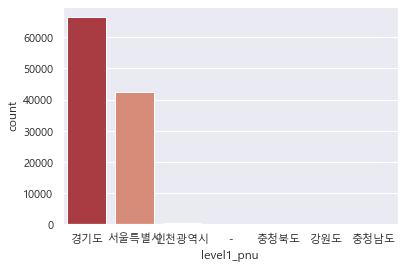

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
ax = sns.countplot(x=df_total['level1_pnu'], palette = "RdBu")



In [15]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.(집중! 주어진 데이터 정의와 차이 나는 점을 찾아내보세요.)
# 1. 
# 2.
# 3.

In [16]:
# 아래에 단서를 적어주세요.
단서4 = "countplot"# 단서4를 적어주세요.(문자형으로 적어주세요.)

#### [실습문제5] 데이터 분포 알아보기_2
* 변수 df_total에서 'ET'(실제 걸린 시간) 변수를 기준으로 DistPlot(히스토그램)를 그려보고 인사이트를 도출해보세요.
* 단서 : 그려진 차트에서 Y축의 이름은? Hint : 그려진 차트를 잘 살펴보세요. Y축에 있는 'Doooooo'

C:\Users\jg311\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


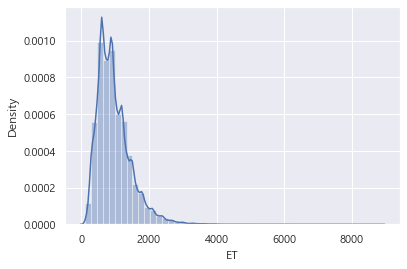

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import matplotlib.pyplot as plt

x = df_total['ET']

sns.distplot(x)
plt.show()

In [18]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.(집중! 데이터 분포의 모양을 잘 살펴봐주세요.)
# 1. 
# 2.
# 3.

In [19]:
# 아래에 단서를 적어주세요.
단서5 = "Density"# 단서5를 적어주세요.(문자형으로 적어주세요.)

#### [실습문제6] 데이터 분포 알아보기_3
* 변수 df_total에서 X축은 'level1_pnu', Y축은 'ET'(실제 걸린 시간) 변수를 기준으로 BoxPlot를 그려보고 인사이트를 도출해보세요.
* 단서 : 충청북도와 강원도, 충청남도의 이상치(Outlier)는 몇 개인가요? Hint : 無에서 왔다 無로 간다.

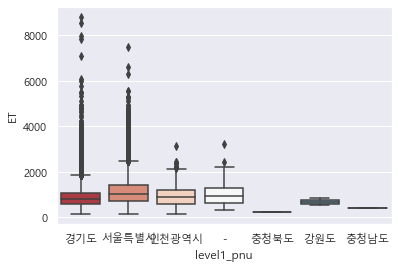

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import matplotlib.pyplot as plt

sns.boxplot(x = df_total['level1_pnu'], y = df_total['ET'], data = df_total, palette = "RdBu")
plt.show()

In [21]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

In [22]:
# 아래에 단서를 적어주세요.
단서6 = "0"# 단서6을 적어주세요.(문자형으로 적어주세요.)

#### [실습문제7] 데이터 분포 알아보기_4
* 현재의 변수 df_total를 기준으로 Pairplot를 그려보고 인사이트를 도출해보세요.
* 단서 : Pairplot으로 그릴 수 있는 변수는 몇 개인가요? Hint : Pairplot은 수치형 변수만 시각화 할 수 있어요.

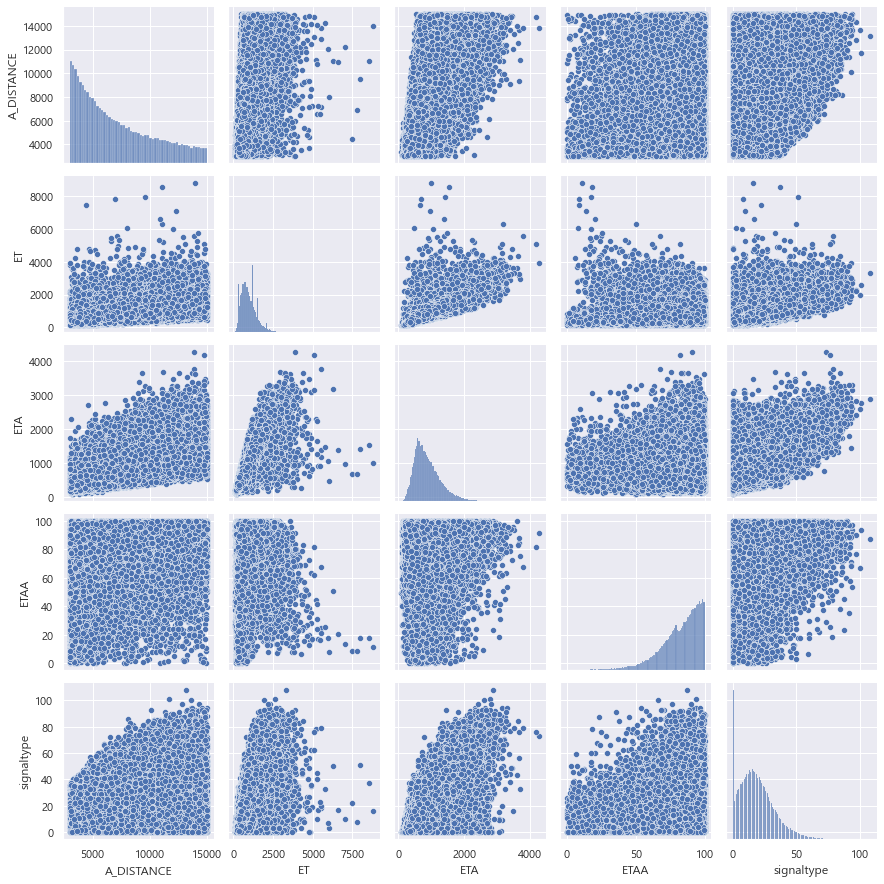

In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import matplotlib.pyplot as plt

sns.pairplot(df_total)
plt.show()

In [24]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

In [25]:
# 아래에 단서를 적어주세요.
단서7 = "5"# 단서7을 적어주세요.(문자형으로 적어주세요.)

### 다. 상관관계 분석(Pandas/Seaborn)
##### 상관관계 분석은 왜 하는것일까요? 변수 간 관계를 들여다보기 위해서!
##### 막연하게 상관관계는 높으면 좋을 것 같습니다. 하지만 AI모델링 또는 통계분석에서 꼭 좋은 것은 아닙니다. 가령 살아온 날수와 식사를 한 끼니 수는 강한 상관관계를 가질 것입니다. 그러나 조금만 다르게 보면 둘은 같은 이야기를 하는 것이라고 할 수 있습니다.(독립변수 간에 상관관계가 너무 높은 경우 다중공선성의 문제 발생 : 해당 변수의 종속변수에 미치는 영향력을 올바로 설명하지 못하게 됨)
##### 물론 상관관계 계수만으로 어떤 결정을 한다는 것은 섣부른 일입니다. 어떤 변수인지 확인이 반드시 필요하며, 시각화를 통해 분포도 확인하고 결정을 해야합니다.
[다중공선성 해결 Tip]
* 상관관계가 높은 독립변수중 하나 혹은 일부를 제거
* 변수를 변형시키거나 새로운 관측치를 이용
* 기타 다른 분석을 이용

#### [실습문제8] 데이터 분포 알아보기_5
* 변수 df_total를 토대로 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.
* 단서 : 'ETA'와 'ET'의 상관계수는 얼마인가요?(소수점 2째자리까지)

In [30]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
sns.heatmap(df_total.corr(), annot = True)
plt.show()



ValueError: could not convert string to float: 'router-84875df7fc-b5nxc-7-20255166-0'

In [29]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
df_total.info()
# 2.
# 3.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109273 entries, 0 to 109272
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RID                 109273 non-null  object 
 1   TIME_DEPARTUREDATE  109273 non-null  object 
 2   TIME_ARRIVEDATE     109273 non-null  object 
 3   A_DISTANCE          109273 non-null  float64
 4   ET                  109273 non-null  float64
 5   ETA                 109273 non-null  float64
 6   ETAA                109273 non-null  float64
 7   level1_pnu          109273 non-null  object 
 8   level2_pnu          109273 non-null  object 
 9   signaltype          109273 non-null  float64
dtypes: float64(5), object(5)
memory usage: 9.2+ MB


In [28]:
# 아래에 단서를 적어주세요.
단서8 = "0.84"# 단서8을 적어주세요.(문자형으로 적어주세요.)

### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 찾았습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [ ]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.firstModule(ID, 단서1, 단서2, 단서3, 단서4, 단서5, 단서6, 단서7, 단서8)

In [ ]:
# 확인
from IPython.display import Image
Image("./dragonball/1성구.png", width=300, height=300)